In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.8 MB/s eta 0:00:00


In [ ]:
from google.colab import files
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
from collections import Counter
import re
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
import gensim
import pyLDAvis
import pyLDAvis.gensim

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing data

In [ ]:
files.upload()
!kaggle datasets download -d benhamner/nips-papers

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/benhamner/nips-papers
License(s): ODbL-1.0
100% 141M/141M [00:02<00:00, 90.3MB/s]
100% 141M/141M [00:02<00:00, 63.2MB/s]


In [ ]:
with zipfile.ZipFile('/content/nips-papers.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

os.listdir('/content/dataset')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['papers.csv', 'authors.csv', 'database.sqlite', 'paper_authors.csv']

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/processed_text (1).csv')
#df=pd.read_csv('/content/processed_text (1).csv')
df.head()


,id,title,processed_text
0,1,Self-Organization of Associative Database and ...,"['767', 'selforganization', 'associative', 'da..."
1,10,A Mean Field Theory of Layer IV of Visual Cort...,"['683', 'mean', 'field', 'theory', 'layer', 'v..."
2,100,Storing Covariance by the Associative Long-Ter...,"['394', 'storing', 'covariance', 'associative'..."
3,1000,Bayesian Query Construction for Neural Network...,"['bayesian', 'query', 'construction', 'neural'..."
4,1001,"Neural Network Ensembles, Cross Validation, an...","['neural', 'network', 'ensemble', 'cross', 'va..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7241 non-null   int64 
 1   year        7241 non-null   int64 
 2   title       7241 non-null   object
 3   event_type  2422 non-null   object
 4   pdf_name    7241 non-null   object
 5   abstract    7241 non-null   object
 6   paper_text  7241 non-null   object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.paper_text[1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISUAL CORTEX\nAND ITS APPLICATION TO ARTIFICIAL NEURAL NETWORKS*\nChristopher L. Scofield\nCenter for Neural Science and Physics Department\nBrown University\nProvidence, Rhode Island 02912\nand\nNestor, Inc., 1 Richmond Square, Providence, Rhode Island,\n02906.\nABSTRACT\nA single cell theory for the development of selectivity and\nocular dominance in visual cortex has been presented previously\nby Bienenstock, Cooper and Munrol. This has been extended to a\nnetwork applicable to layer IV of visual cortex 2 . In this paper\nwe present a mean field approximation that captures in a fairly\ntransparent manner the qualitative, and many of the\nquantitative, results of the network theory. Finally, we consider\nthe application of this theory to artificial neural networks and\nshow that a significant reduction in architectural complexity is\npossible.\nA SINGLE LAYER NETWORK AND THE MEAN FIELD\nAPPROXIMATION\nWe consider a single layer network of i

In [ ]:
df.drop(['event_type', 'pdf_name','event_type','pdf_name'], axis=1, inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,year,title,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


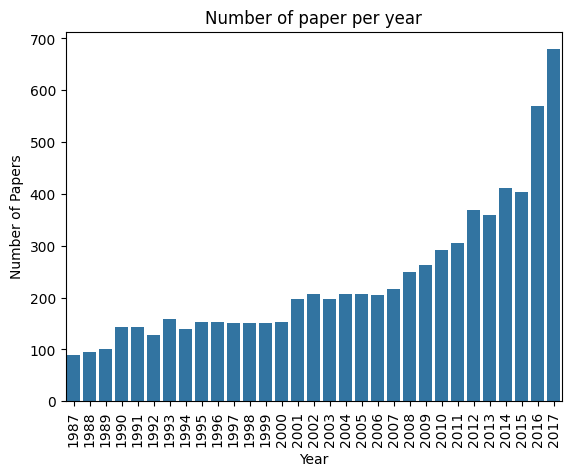

In [ ]:
sns.countplot(data=df, x='year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Number of Papers')
plt.title('Number of paper per year')
plt.show()

In [ ]:
df.drop(['year', 'abstract'], axis=1, inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,title,paper_text
0,1,Self-Organization of Associative Database and ...,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,A Mean Field Theory of Layer IV of Visual Cort...,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,Storing Covariance by the Associative Long-Ter...,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,Bayesian Query Construction for Neural Network...,Bayesian Query Construction for Neural\nNetwor...
4,1001,"Neural Network Ensembles, Cross Validation, an...","Neural Network Ensembles, Cross\nValidation, a..."


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7241, 3)

# EDA

In [ ]:
print(df.isnull().sum())
df['paper_text'].nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id            0
title         0
paper_text    0
dtype: int64


7237

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


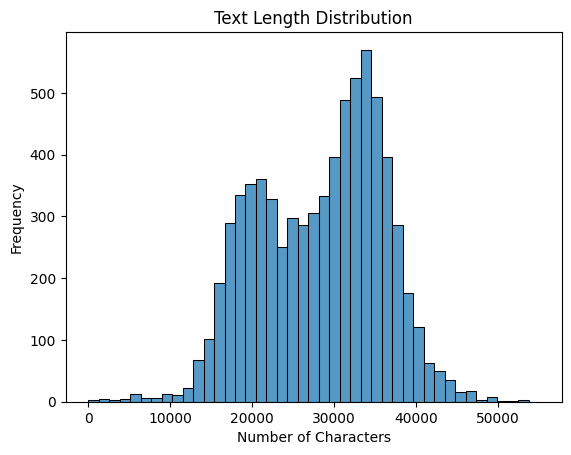

In [ ]:
df['text_length'] = df['paper_text'].apply(len)
sns.histplot(df['text_length'], binrange=[0,55000] )#,kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


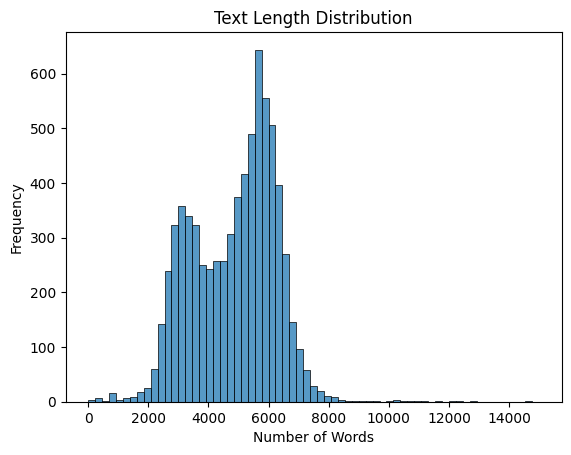

In [ ]:
df['text_length'] = df['paper_text'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'], binrange=[0,15000] )#,kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


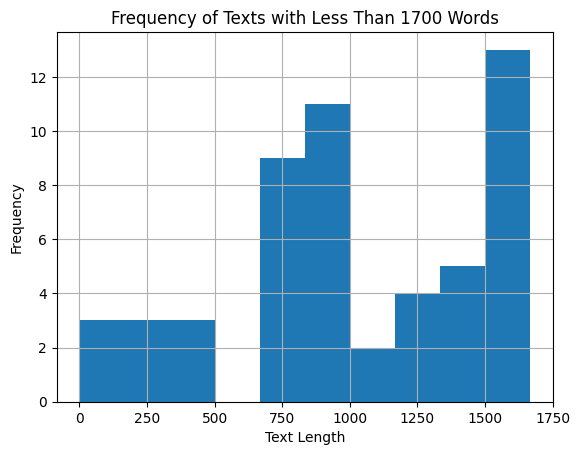

In [ ]:
df[df['text_length'] < 1700]['text_length'].hist()
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Frequency of Texts with Less Than 1700 Words')
plt.show()

In [ ]:
df.drop(['text_length'], axis=1, inplace=True)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,title,paper_text
0,1,Self-Organization of Associative Database and ...,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,A Mean Field Theory of Layer IV of Visual Cort...,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,Storing Covariance by the Associative Long-Ter...,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,Bayesian Query Construction for Neural Network...,Bayesian Query Construction for Neural\nNetwor...
4,1001,"Neural Network Ensembles, Cross Validation, an...","Neural Network Ensembles, Cross\nValidation, a..."


# Pre processing

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def preprocess_text(text):
    text = text.strip()
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if len(word) > 2  ]
    # stemmer = PorterStemmer()
    # tokens = [stemmer.stem(word) for word in tokens]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    vocabulary = set(tokens)

    return tokens




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df['processed_text'] = df['paper_text'].apply(preprocess_text)
all_words = [word for text in df['processed_text'] for word in text if word not in stop_words]
word_counts = Counter(all_words)
print(word_counts.most_common(20))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('model', 150817), ('algorithm', 115698), ('learning', 103955), ('function', 96620), ('data', 91650), ('set', 87998), ('network', 76249), ('method', 72975), ('problem', 72184), ('using', 67955), ('result', 64255), ('one', 61167), ('time', 60017), ('distribution', 59872), ('number', 57115), ('figure', 54921), ('two', 51557), ('matrix', 51256), ('parameter', 49947), ('value', 49553)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


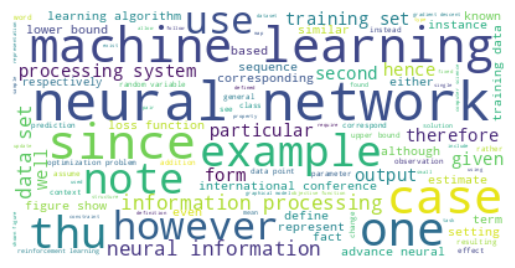

In [ ]:
all_text = ' '.join([' '.join(text) for text in df['processed_text'].values])
wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(all_text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# df.drop(['paper_text'], axis=1, inplace=True)
# df.head()

,id,title,processed_text
0,1,Self-Organization of Associative Database and ...,"[767, selforganization, associative, database,..."
1,10,A Mean Field Theory of Layer IV of Visual Cort...,"[683, mean, field, theory, layer, visual, cort..."
2,100,Storing Covariance by the Associative Long-Ter...,"[394, storing, covariance, associative, longte..."
3,1000,Bayesian Query Construction for Neural Network...,"[bayesian, query, construction, neural, networ..."
4,1001,"Neural Network Ensembles, Cross Validation, an...","[neural, network, ensemble, cross, validation,..."


In [ ]:
df.to_csv('processed_text.csv', index=False)
#print(df['processed_text'][2])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

,id,title,processed_text
0,1,Self-Organization of Associative Database and ...,"[767, selforganization, associative, database,..."
1,10,A Mean Field Theory of Layer IV of Visual Cort...,"[683, mean, field, theory, layer, visual, cort..."
2,100,Storing Covariance by the Associative Long-Ter...,"[394, storing, covariance, associative, longte..."
3,1000,Bayesian Query Construction for Neural Network...,"[bayesian, query, construction, neural, networ..."
4,1001,"Neural Network Ensembles, Cross Validation, an...","[neural, network, ensemble, cross, validation,..."


In [ ]:
# df = pd.read_csv('/content/processed_text (1).csv')
# df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,title,processed_text
0,1,Self-Organization of Associative Database and ...,"['767', 'selforganization', 'associative', 'da..."
1,10,A Mean Field Theory of Layer IV of Visual Cort...,"['683', 'mean', 'field', 'theory', 'layer', 'v..."
2,100,Storing Covariance by the Associative Long-Ter...,"['394', 'storing', 'covariance', 'associative'..."
3,1000,Bayesian Query Construction for Neural Network...,"['bayesian', 'query', 'construction', 'neural'..."
4,1001,"Neural Network Ensembles, Cross Validation, an...","['neural', 'network', 'ensemble', 'cross', 'va..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of the vectorized matrix: (7241, 130828)


# MODEL 1


In [ ]:
import ast
if isinstance(df['processed_text'][0], str):
    df['processed_text'] = df['processed_text'].apply(ast.literal_eval)

In [9]:
from gensim import corpora
#df['processed_text'] = df['processed_text'].astype(str)
dictionary = corpora.Dictionary(df['processed_text'])
dictionary.filter_extremes(no_below=15, no_above=0.75)
corpus = [dictionary.doc2bow(tokens) for tokens in df['processed_text']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=27,
    passes=20,
    random_state=42,
    #update_every=1,
    eta=0.1,
    chunksize=100,
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topics = lda_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic #{idx}: {topic}")

Topic #23: 0.061*"layer" + 0.038*"deep" + 0.034*"unit" + 0.028*"architecture" + 0.025*"hidden" + 0.021*"2016" + 0.020*"trained" + 0.017*"2015" + 0.017*"net" + 0.014*"activation"
Topic #9: 0.066*"kernel" + 0.043*"distance" + 0.040*"cluster" + 0.040*"clustering" + 0.026*"metric" + 0.015*"embedding" + 0.015*"similarity" + 0.012*"embeddings" + 0.012*"kmeans" + 0.012*"neighbor"
Topic #12: 0.091*"transformation" + 0.064*"matching" + 0.040*"encoder" + 0.040*"translation" + 0.030*"invariant" + 0.028*"rotation" + 0.023*"invariance" + 0.022*"template" + 0.022*"alignment" + 0.022*"particle"
Topic #25: 0.051*"loss" + 0.039*"convex" + 0.021*"constraint" + 0.021*"objective" + 0.017*"online" + 0.017*"adversarial" + 0.013*"min" + 0.011*"descent" + 0.011*"minimization" + 0.010*"max"
Topic #8: 0.036*"word" + 0.019*"sequence" + 0.018*"language" + 0.013*"topic" + 0.013*"mnist" + 0.011*"sentence" + 0.011*"cnn" + 0.011*"table" + 0.010*"text" + 0.010*"lstm"
Topic #11: 0.012*"nonlinear" + 0.009*"unit" + 0.009

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_display = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
from gensim.models import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

coherence_model_lda = CoherenceModel(model=lda_model, texts=df['processed_text'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score:', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score: 0.5574588666676658


In [ ]:
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()
topics = lda_model.print_topics(num_words=10)
def get_topic_words(lda_model, num_topics=27, num_words=10):
    topic_words = []
    for topic in range(num_topics):
        words = [word for word, prob in lda_model.show_topic(topic, topn=num_words)]
        topic_words.append(words)


    return topic_words


topics = get_topic_words(lda_model)
print(topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['graph', 'edge', 'node', 'vertex', 'submodular', 'constraint', 'partition', 'subset', 'degree', 'community'], ['query', 'score', 'user', 'item', 'dataset', 'datasets', 'search', '2006', 'ranking', 'acm'], ['sparse', 'tensor', 'noise', 'norm', 'column', 'rank', 'subspace', 'entry', 'recovery', 'decomposition'], ['prior', 'posterior', 'sampling', 'bayesian', 'density', 'variance', 'estimator', 'covariance', 'likelihood', 'regression'], ['detection', 'motion', 'video', 'frame', 'flow', 'pose', 'sensor', 'location', 'tracking', 'estimation'], ['bound', 'theorem', 'log', 'proof', 'lemma', 'complexity', 'estimator', 'empirical', 'hold', 'bounded'], ['dynamic', 'sequence', 'transition', 'phase', 'noise', 'energy', 'stable', 'simulation', 'mode', 'dynamical'], ['image', 'object', 'convolutional', 'visual', 'pixel', 'recognition', 'map', 'vision', 'segmentation', 'scene'], ['word', 'sequence', 'language', 'topic', 'mnist', 'sentence', 'cnn', 'table', 'text', 'lstm'], ['kernel', 'distance', 'c

In [ ]:
print(topics)

[(4, '0.040*"detection" + 0.034*"motion" + 0.033*"video" + 0.033*"frame" + 0.027*"flow" + 0.019*"pose" + 0.012*"sensor" + 0.012*"location" + 0.011*"tracking" + 0.011*"estimation"'), (23, '0.061*"layer" + 0.038*"deep" + 0.034*"unit" + 0.028*"architecture" + 0.025*"hidden" + 0.021*"2016" + 0.020*"trained" + 0.017*"2015" + 0.017*"net" + 0.014*"activation"'), (22, '0.009*"table" + 0.009*"group" + 0.008*"selection" + 0.008*"accuracy" + 0.008*"supplementary" + 0.007*"200" + 0.007*"1000" + 0.006*"001" + 0.006*"arxiv" + 0.005*"000"'), (7, '0.104*"image" + 0.039*"object" + 0.022*"convolutional" + 0.018*"visual" + 0.015*"pixel" + 0.014*"recognition" + 0.013*"map" + 0.013*"vision" + 0.010*"segmentation" + 0.009*"scene"'), (18, '0.044*"policy" + 0.032*"action" + 0.028*"reward" + 0.024*"agent" + 0.023*"regret" + 0.020*"game" + 0.015*"arm" + 0.014*"reinforcement" + 0.014*"bandit" + 0.011*"player"'), (15, '0.013*"prediction" + 0.010*"human" + 0.008*"rule" + 0.008*"target" + 0.008*"question" + 0.007*"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


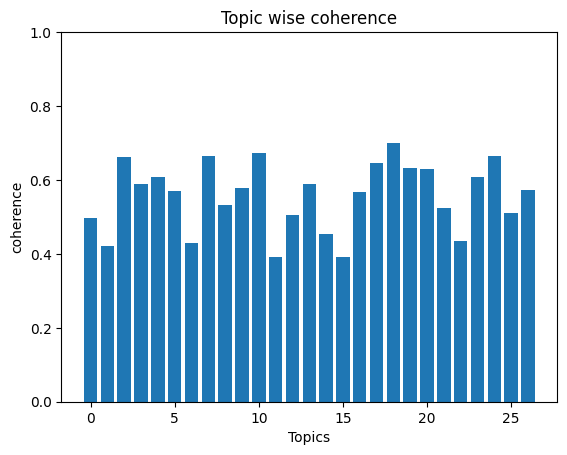

In [ ]:
topics_str = [ ' '.join(t) for t in topics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )

plt.figure()
plt.bar(data_topic_score.index, data_topic_score['Coherence'])
plt.title('Topic wise coherence')
plt.xlabel('Topics')
plt.ylim(0,1)
plt.ylabel('coherence')
plt.show()

# Lda with tfidf


In [10]:
from gensim.models import TfidfModel

tfidf_model = TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
lda_model_tfidf = LdaModel(
    corpus=corpus_tfidf,
    id2word=dictionary,
    num_topics=27,
    passes=15,
    random_state=42
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
coherence_lda_tfidf = CoherenceModel(model=lda_model_tfidf, texts=df['processed_text'], dictionary=dictionary, coherence='c_v')
coherence_tfidf = coherence_lda_tfidf.get_coherence()
print('\nCoherence Score:', coherence_tfidf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score: 0.5474514121569697


In [23]:
coherence_per_topic = coherence_lda_tfidf.get_coherence_per_topic()
topics = lda_model_tfidf.print_topics(num_words=10)
def get_topic_words(lda_model, num_topics=27, num_words=10):
    topic_words = []
    for topic in range(num_topics):
        words = [word for word, prob in lda_model.show_topic(topic, topn=num_words)]
        topic_words.append(words)


    return topic_words


topics = get_topic_words(lda_model_tfidf)
print(topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['motif', 'rollout', 'sect', 'rollouts', 'cerebellar', 'crystal', 'lqr', 'forecaster', 'dyna', 'purkinje'], ['image', 'kernel', 'layer', 'training', 'network', 'object', 'feature', 'classifier', 'latent', 'hidden'], ['dropout', 'fairness', 'bci', 'csp', 'sta', 'preconditioner', 'subnetworks', 'spiketriggered', 'braincomputer', 'nmse'], ['spam', 'reservoir', 'glms', 'wkj', 'pmax', 'som', 'concreteness', '7500', 'rrt', '8020'], ['streaming', 'covariates', 'covariate', 'mmse', 'fused', 'haar', 'helicopter', 'motoneuron', 'dialogue', 'mai'], ['lsh', 'bilingual', 'renyi', 'gmms', 'injection', 'monolingual', 'kcca', 'multilingual', 'dann', 'drain'], ['privacy', 'ibp', 'hme', 'md', 'ncut', 'qk1', 'aircraft', 'smolensky', 'zjk', 'quantizer'], ['odor', 'dominance', 'superresolution', 'multiview', 'shapley', 'olfactory', 'eld', 'kpca', 'dipole', 'divisive'], ['saliency', 'eye', 'motion', 'screening', 'pooling', 'movement', 'crf', 'fixation', 'saccade', 'velocity'], ['contact', 'sem', 'deco', 'b

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


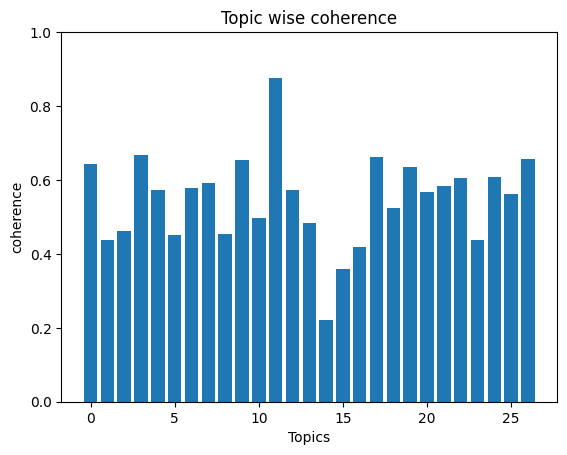

In [24]:
topics_str = [ ' '.join(t) for t in topics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )

plt.figure()
plt.bar(data_topic_score.index, data_topic_score['Coherence'])
plt.title('Topic wise coherence')
plt.xlabel('Topics')
plt.ylim(0,1)
plt.ylabel('coherence')
plt.show()

In [26]:
lda_display = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# NMF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

lemmatized_text = [' '.join(tokens) for tokens in df['processed_text']]

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

tfidf_matrix = vectorizer.fit_transform(lemmatized_text)


print("Shape of the vectorized matrix:", tfidf_matrix.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of the vectorized matrix: (7241, 130828)


In [ ]:
from sklearn.decomposition import NMF
feature_names = vectorizer.get_feature_names_out()

num_topics = 27
nmf_model = NMF(n_components=num_topics, random_state=42)

nmf_model.fit(tfidf_matrix)

for topic_idx, topic in enumerate(nmf_model.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx}: {', '.join(top_words)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Topic 0: data, point, method, time, component, analysis, figure, approach, number, experiment
Topic 1: model, parameter, prediction, structure, generative, neural, modeling, data, mixture, given
Topic 2: network, neural, layer, input, unit, output, training, weight, deep, architecture
Topic 3: image, object, pixel, scene, visual, figure, recognition, patch, segmentation, shape
Topic 4: policy, reward, action, agent, state, value, optimal, reinforcement, decision, mdp
Topic 5: algorithm, time, online, step, number, update, iteration, problem, setting, guarantee
Topic 6: cell, response, stimulus, figure, signal, visual, information, field, input, filter
Topic 7: function, value, submodular, loss, point, approximation, optimization, space, linear, given
Topic 8: error, training, input, weight, test, value, point, example, output, noise
Topic 9: graph, edge, vertex, node, random, variable, structure, network, graphical, degree
Topic 10: distribution, sample, probability, estimator, density

# LDA with ngram

In [27]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser


bigram = Phrases(df['processed_text'], min_count=5, threshold=10)
trigram = Phrases(bigram[df['processed_text']], threshold=10)


bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)


df['bigrams'] = df['processed_text'].apply(lambda x: bigram_mod[x])
df['trigrams'] = df['bigrams'].apply(lambda x: trigram_mod[x])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
dictionary_n = Dictionary(df['trigrams'])
dictionary_n.filter_extremes(no_below=10, no_above=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
corpus_n = [dictionary.doc2bow(text) for text in df['trigrams']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
from gensim.models import LdaModel

lda_model = LdaModel(
    corpus=corpus_n,
    id2word=dictionary_n,
    num_topics=27,
    passes=10,
    random_state=42,
    chunksize=100,
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
coherence_lda_n = CoherenceModel(model=lda_model, texts=df['trigrams'], dictionary=dictionary_n, coherence='c_v')
coherence_n = coherence_lda_n.get_coherence()
print('\nCoherence Score:', coherence_n)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score: 0.4583224483538104


In [43]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

lda_vis = gensimvis.prepare(lda_model, corpus_n, dictionary_n)
pyLDAvis.display(lda_vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
coherence_per_topic = coherence_lda_n.get_coherence_per_topic()
topics = lda_model.print_topics(num_words=10)
def get_topic_words(lda_model, num_topics=27, num_words=10):
    topic_words = []
    for topic in range(num_topics):
        words = [word for word, prob in lda_model.show_topic(topic, topn=num_words)]
        topic_words.append(words)


    return topic_words


topics = get_topic_words(lda_model)
print(topics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['monte_carlo_method', '1979', 'j1m', 'turk', 'mackay', 'tip', 'roughly', 'switch', 'dotted_line_represent', 'iso'], ['phenomenon', 'computer_vision', 'move', 'speed', 'transmitted', 'version', 'node', 'address', 'establish_relationship', '304'], ['repeat', 'unit', 'inexact', 'spite', 'unknown', 'realworld', 'interested_understanding', 'iterate_convergence', 'plus_minus', 'exponential'], ['394', 'teach', '476', 'prevent', 'motor_area', 'writing', 'king', 'methodology', 'spatial', 'optimization'], ['heidelberg', 'tolerance', 'chow', 'upper_limit', 'finitely', 'suen', 'decrease', '396', 'generation', 'exists'], ['circle', 'pdn', '200_300_400_500', 'modelling', '692', 'xaxis', 'aps', 'grant_national_science_foundation', 'rms_error', 'english'], ['event', 'science', 'strong_preference', 'largest', 'markov', 'irwin', 'lewis', 'heuristic_search', 'shortcoming', 'lang_phoneme_recognition'], ['trajectory', 'nearly_perfectly', 'hebbian_antihebbian', 'multilayer_feedforward_network', 'proc_natl

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


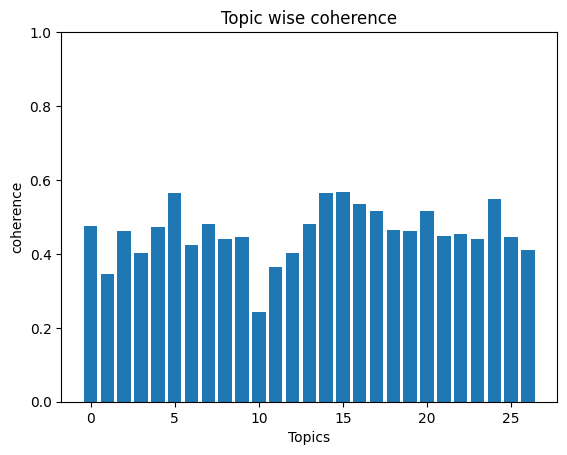

In [45]:
topics_str = [ ' '.join(t) for t in topics ]
data_topic_score = pd.DataFrame( data=zip(topics_str, coherence_per_topic), columns=['Topic', 'Coherence'] )

plt.figure()
plt.bar(data_topic_score.index, data_topic_score['Coherence'])
plt.title('Topic wise coherence')
plt.xlabel('Topics')
plt.ylim(0,1)
plt.ylabel('coherence')
plt.show()

In [38]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,title,processed_text,bigrams,trigrams
0,1,Self-Organization of Associative Database and ...,"[767, selforganization, associative, database,...","[767, selforganization_associative, database, ...","[767, selforganization_associative, database, ..."
1,10,A Mean Field Theory of Layer IV of Visual Cort...,"[683, mean, field, theory, layer, visual, cort...","[683, mean_field, theory, layer, visual_cortex...","[683, mean_field, theory, layer, visual_cortex..."
2,100,Storing Covariance by the Associative Long-Ter...,"[394, storing, covariance, associative, longte...","[394, storing_covariance, associative_longterm...","[394, storing_covariance, associative_longterm..."
3,1000,Bayesian Query Construction for Neural Network...,"[bayesian, query, construction, neural, networ...","[bayesian, query, construction, neural_network...","[bayesian, query, construction, neural_network..."
4,1001,"Neural Network Ensembles, Cross Validation, an...","[neural, network, ensemble, cross, validation,...","[neural_network, ensemble, cross_validation, a...","[neural_network, ensemble, cross_validation, a..."


In [ ]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

# Function to perform grid search
def tune_lda(dictionary, corpus, texts, param_grid):
    best_model = None
    best_params = None
    best_coherence = -np.inf

    for num_topics in param_grid['num_topics']:
        for alpha in param_grid['alpha']:
            for eta in param_grid['eta']:
                print(f"Training LDA with num_topics={num_topics}, alpha={alpha}, eta={eta}...")

                # Train the LDA model
                lda_model = LdaModel(
                    corpus=corpus_n,
                    id2word=dictionary_n,
                    num_topics=num_topics,
                    passes=10,  # Fixed for grid search; can be tuned separately
                    chunksize=100,
                    random_state=42,
                    alpha=alpha,
                    eta=eta
                )

                # Evaluate the model using coherence score
                coherence_model = CoherenceModel(
                    model=lda_model,
                    texts=texts,
                    dictionary=dictionary_n,
                    coherence='c_v'
                )
                coherence_score = coherence_model.get_coherence()

                print(f"Coherence Score: {coherence_score}")

                # Update best model if coherence score improves
                if coherence_score > best_coherence:
                    best_model = lda_model
                    best_params = {'num_topics': num_topics, 'alpha': alpha, 'eta': eta}
                    best_coherence = coherence_score

    return best_model, best_params, best_coherence

# Define parameter grid
param_grid = {
    'num_topics': [10, 12,15,17, 20,22,25,27,30],  # Adjust based on your data
    'alpha': ['symmetric', 'asymmetric', 0.1],
    'eta': ['symmetric', 'auto', 0.1]
}

# Run the grid search
best_model, best_params, best_coherence = tune_lda(dictionary, corpus, df['trigrams'], param_grid)

print("Best Parameters:", best_params)
print("Best Coherence Score:", best_coherence)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Training LDA with num_topics=10, alpha=symmetric, eta=symmetric...
Coherence Score: 0.4328004100726148
Training LDA with num_topics=10, alpha=symmetric, eta=auto...
Coherence Score: 0.4328004100726148
Training LDA with num_topics=10, alpha=symmetric, eta=0.1...


In [ ]:
top_n_words = 10
unique_words = set(word for topic in topics for word in topic)
topic_diversity = len(unique_words) / (lda_model.num_topics * top_n_words)
print(f'Topic Diversity: {topic_diversity}')

Topic Diversity: 0.4444444444444444


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute Perplexity
perplexity = lda_model.log_perplexity(corpus)
print(f'Perplexity: {perplexity}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity: -8.352867713210046
